Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection and Processing

In [2]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('heart.csv')

In [3]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [6]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

Splitting the Features and Target

In [10]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [11]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [12]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Splitting the Data into Training data & Test Data

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [14]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


Model Training

Logistic Regression

In [15]:
model = LogisticRegression()

In [16]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

c:\Users\Sahil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy Score

In [17]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [18]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8512396694214877


In [19]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming X_test_prediction contains the predicted labels and Y_test contains the true labels

# Accuracy
# test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
# print('Accuracy:', test_data_accuracy)

# Precision
test_data_precision = precision_score(Y_test, X_test_prediction)
print('Precision:', test_data_precision)

# Recall
test_data_recall = recall_score(Y_test, X_test_prediction)
print('Recall:', test_data_recall)

# F1 Score
test_data_f1 = f1_score(Y_test, X_test_prediction)
print('F1 Score:', test_data_f1)

# Confusion Matrix
test_data_confusion = confusion_matrix(Y_test, X_test_prediction)
print('Confusion Matrix:\n', test_data_confusion)


Precision: 0.84375
Recall: 0.8181818181818182
F1 Score: 0.8307692307692308
Confusion Matrix:
 [[23  5]
 [ 6 27]]


In [20]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.819672131147541


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

# Training the logistic regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Making predictions on training data and calculating accuracy
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

# Making predictions on test data and calculating accuracy
X_test_prediction0 = model.predict(X_test)
test_data_accuracy0 = accuracy_score(X_test_prediction0, Y_test)
print('Accuracy on Test data : ', test_data_accuracy0)

# Calculating precision, recall, and F1 score on test data
test_data_precision0 = precision_score(Y_test, X_test_prediction0, average='weighted')
test_data_recall0 = recall_score(Y_test, X_test_prediction0, average='weighted')
test_data_0f1 = f1_score(Y_test, X_test_prediction0, average='weighted')
print('Precision on Test data : ', test_data_precision0)
print('Recall on Test data : ', test_data_recall0)
print('F1 Score on Test data : ', test_data_0f1)

# Calculating confusion matrix
test_data_confusion0 = confusion_matrix(Y_test, X_test_prediction0)
print('Confusion Matrix on Test data : \n', test_data_confusion0)


(303, 13) (242, 13) (61, 13)
Accuracy on Training data :  0.8512396694214877
Accuracy on Test data :  0.819672131147541
Precision on Test data :  0.820502402487281
Recall on Test data :  0.819672131147541
F1 Score on Test data :  0.8198668171058162
Confusion Matrix on Test data : 
 [[23  5]
 [ 6 27]]


c:\Users\Sahil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
from sklearn import svm
# Training the SVM model
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

# Making predictions on training data and calculating accuracy
X_train_prediction1 = classifier.predict(X_train)
training_data_accuracy1 = accuracy_score(X_train_prediction1, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

# Making predictions on test data and calculating accuracy
X_test_prediction1 = classifier.predict(X_test)
test_data_accuracy1 = accuracy_score(X_test_prediction1, Y_test)
print('Accuracy on Test data : ', test_data_accuracy1)

# Calculating precision, recall, and F1 score on test data
test_data_precision1 = precision_score(Y_test, X_test_prediction1, average='weighted')
test_data_recall1 = recall_score(Y_test, X_test_prediction1, average='weighted')
test_data_1f1 = f1_score(Y_test, X_test_prediction1, average='weighted')
print('Precision on Test data : ', test_data_precision1)
print('Recall on Test data : ', test_data_recall1)
print('F1 Score on Test data : ', test_data_1f1)

# Calculating confusion matrix
test_data_confusion1 = confusion_matrix(Y_test, X_test_prediction)
print('Confusion Matrix on Test data : \n', test_data_confusion)


Accuracy on Training data :  0.8512396694214877
Accuracy on Test data :  0.819672131147541
Precision on Test data :  0.8213661202185794
Recall on Test data :  0.819672131147541
F1 Score on Test data :  0.8184886832797643
Confusion Matrix on Test data : 
 [[23  5]
 [ 6 27]]


In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score

# Define the CNN architecture
model_cnn = models.Sequential([
    layers.Input(shape=(13,)),
    layers.Reshape((13, 1, 1)),
    layers.Conv2D(32, (3, 1), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


# Compile the model
model_cnn.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

model_cnn.fit(X_train, Y_train, epochs=1000, batch_size=16)



# Evaluate the model on training data
Y_train_prediction = model_cnn.predict(X_train)
training_data_accuracy = accuracy_score(tf.argmax(Y_train_prediction, axis=1), Y_train)
print("Training data accuracy:", training_data_accuracy)
# test_data_accuracy = accuracy_score(tf.argmax(Y_train_prediction, axis=1), Y_test)
training_data_precision = precision_score(Y_train, tf.argmax(Y_train_prediction, axis=1), average='weighted')
training_data_recall = recall_score(Y_train, tf.argmax(Y_train_prediction, axis=1), average='weighted')
training_data_f1 = f1_score(Y_train, tf.argmax(Y_train_prediction, axis=1), average='weighted')
training_data_confusion = confusion_matrix(Y_train, tf.argmax(Y_train_prediction, axis=1))

print("Test Data Accuracy:", test_data_accuracy)
print("Test Data Precision:", test_data_precision)
print("Test Data Recall:", test_data_recall)
print("Test Data F1 Score:", test_data_f1)
print("Test Data Confusion Matrix:\n", test_data_confusion)


Epoch 1/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5330 - loss: 2.4832   
Epoch 2/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5861 - loss: 1.4676 
Epoch 3/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6940 - loss: 0.8841 
Epoch 4/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6686 - loss: 0.8152 
Epoch 5/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7339 - loss: 0.6126 
Epoch 6/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7152 - loss: 0.8079 
Epoch 7/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5111 - loss: 2.9200 
Epoch 8/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5769 - loss: 1.7578 
Epoch 9/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7317 - loss: 0.7067 
Epoch 10/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7045 - loss: 0.6329 
Epoch 11/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6743 - loss: 0.7572 
Epoch 12/1000
16/16 ━━━━━━━━━━━━━━━━━━━

C:\Users\Sahil\AppData\Local\Temp\ipykernel_4584\2190611934.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(algorithms, rotation=45)
C:\Users\Sahil\AppData\Local\Temp\ipykernel_4584\2190611934.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(algorithms, rotation=45)
C:\Users\Sahil\AppData\Local\Temp\ipykernel_4584\2190611934.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(algorithms, rotation=45)
C:\Users\Sahil\AppData\Local\Temp\ipykernel_4584\2190611934.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(algorithms, rotation=45)


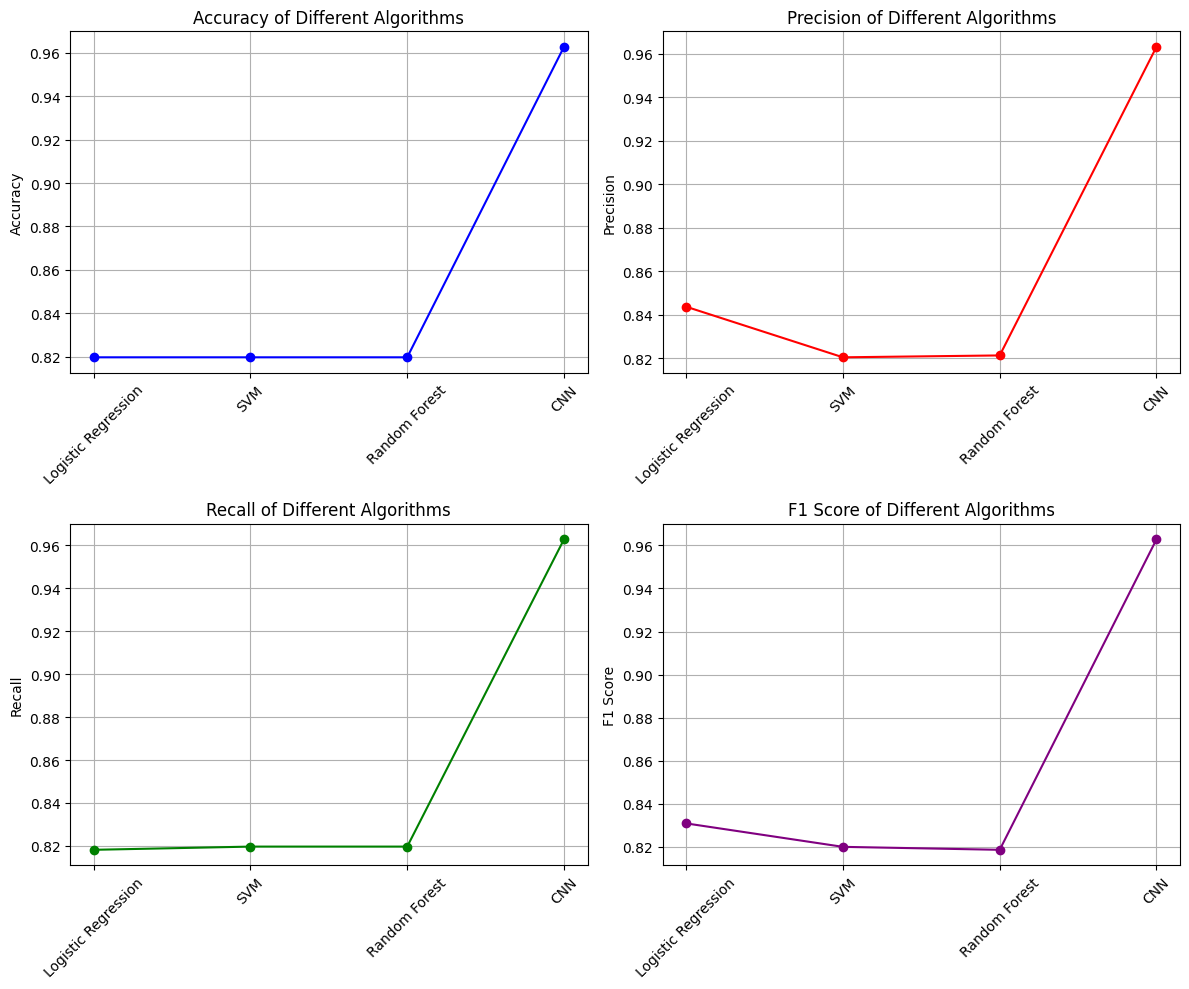

In [24]:
import matplotlib.pyplot as plt

# Performance metrics values for each algorithm
accuracy_values = [test_data_accuracy, test_data_accuracy0, test_data_accuracy1, training_data_accuracy]
precision_values = [test_data_precision, test_data_precision0, test_data_precision1, training_data_precision]
recall_values = [test_data_recall, test_data_recall0, test_data_recall1, training_data_recall]
f1_values = [test_data_f1, test_data_0f1, test_data_1f1, training_data_f1]

# Algorithm names
algorithms = [ 'Logistic Regression','SVM', 'Random Forest', 'CNN']

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Accuracy plot
axs[0, 0].plot(algorithms, accuracy_values, marker='o', linestyle='-', color='b')
axs[0, 0].set_title('Accuracy of Different Algorithms')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].grid(True)

# Precision plot
axs[0, 1].plot(algorithms, precision_values, marker='o', linestyle='-', color='r')
axs[0, 1].set_title('Precision of Different Algorithms')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].grid(True)

# Recall plot
axs[1, 0].plot(algorithms, recall_values, marker='o', linestyle='-', color='g')
axs[1, 0].set_title('Recall of Different Algorithms')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].grid(True)

# F1 Score plot
axs[1, 1].plot(algorithms, f1_values, marker='o', linestyle='-', color='purple')
axs[1, 1].set_title('F1 Score of Different Algorithms')
axs[1, 1].set_ylabel('F1 Score')
axs[1, 1].grid(True)

# Rotate x-axis labels
for ax in axs.flat:
    ax.set_xticklabels(algorithms, rotation=45)

plt.tight_layout()
plt.show()


In [25]:


# Training the Random Forest model
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier()
model.fit(X_train, Y_train)

# Making predictions on training data and calculating accuracy
X_train_prediction2 = model.predict(X_train)
training_data_accuracy2 = accuracy_score(X_train_prediction2, Y_train)
print('Accuracy on Training data : ', training_data_accuracy2)

# Making predictions on test data and calculating accuracy
X_test_prediction2 = model.predict(X_test)
test_data_accuracy2 = accuracy_score(X_test_prediction2, Y_test)
print('Accuracy on Test data : ', test_data_accuracy2)

# Calculating precision, recall, and F1 score on test data
test_data_precision2 = precision_score(Y_test, X_test_prediction, average='weighted')
test_data_recall2 = recall_score(Y_test, X_test_prediction, average='weighted')
test_data_2f1 = f1_score(Y_test, X_test_prediction, average='weighted')
print('Precision on Test data : ', test_data_precision)
print('Recall on Test data : ', test_data_recall)
print('F1 Score on Test data : ', test_data_2f1)

# Calculating confusion matrix
test_data_confusion2 = confusion_matrix(Y_test, X_test_prediction)
print('Confusion Matrix on Test data : \n', test_data_confusion2)


Accuracy on Training data :  1.0
Accuracy on Test data :  0.7540983606557377
Precision on Test data :  0.84375
Recall on Test data :  0.8181818181818182
F1 Score on Test data :  0.8198668171058162
Confusion Matrix on Test data : 
 [[23  5]
 [ 6 27]]


Building a Predictive System

In [26]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


c:\Users\Sahil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Saving the trained model

In [27]:
import pickle

In [28]:
filename = 'heart_disease_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [29]:
# loading the saved model
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))

In [30]:
for column in X.columns:
  print(column)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
